In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from bs4 import BeautifulSoup
import statsmodels.api as sm
from scipy.stats.mstats import winsorize

In [ ]:
tv_shows = pd.read_csv('TV_Shows1.csv')


data_types = {
    'Title': 'nominal',
    'Genre': 'nominal',
    'Rating': 'ordinal',
    'Release Year': 'interval',
    'IMDb Votes': 'ratio',
    'No of Seasons': 'ratio',
    'Rotten Tomatoes': 'ratio',
    'Netflix': 'nominal',
    'Hulu': 'nominal',
    'Prime Video': 'nominal',
    'Disney+': 'nominal'
}


for variable, data_type in data_types.items():
    print(f'{variable}: {data_type}')

Title: nominal
Genre: nominal
Rating: ordinal
Release Year: interval
IMDb Votes: ratio
No of Seasons: ratio
Rotten Tomatoes: ratio
Netflix: nominal
Hulu: nominal
Prime Video: nominal
Disney+: nominal


In [ ]:
tv_shows = pd.read_csv('TV_Shows1.csv')


print(tv_shows.isnull().sum())


print(tv_shows.duplicated().sum())


print(tv_shows.dtypes)
print(tv_shows.head())

Unnamed: 0           0
Title                0
Year                 0
Age                 31
IMDb                 0
Rotten Tomatoes    155
Netflix              0
Hulu                 0
Prime Video          0
Disney+              0
dtype: int64
0
Unnamed: 0           int64
Title               object
Year                 int64
Age                 object
IMDb               float64
Rotten Tomatoes     object
Netflix              int64
Hulu                 int64
Prime Video          int64
Disney+              int64
dtype: object
   Unnamed: 0             Title  Year  Age  IMDb Rotten Tomatoes  Netflix  \
0           0      Breaking Bad  2008  18+   9.5             96%        1   
1           1   Stranger Things  2016  16+   8.8             93%        1   
2           2       Money Heist  2017  18+   8.4             91%        1   
3           3          Sherlock  2010  16+   9.1             78%        1   
4           4  Better Call Saul  2015  18+   8.7             97%        1   

   Hulu 

In [ ]:
tv_shows['IMDb'].fillna(tv_shows['IMDb'].mean(), inplace=True)

<ipython-input-16-eb978bb4cf39>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  tv_shows['IMDb'].fillna(tv_shows['IMDb'].mean(), inplace=True)


In [ ]:
tv_shows.drop_duplicates(inplace=True)

In [ ]:

tv_shows['Year'] = tv_shows['Year'].astype(int)

In [ ]:

numerical_features = ['IMDb', 'Rotten Tomatoes']

In [ ]:

for feature in numerical_features:
    if feature == 'Rotten Tomatoes':

        if tv_shows[feature].dtype == object:

            tv_shows[feature] = tv_shows[feature].str.replace('%', '').astype(float)
        else:

            tv_shows[feature] = pd.to_numeric(tv_shows[feature], errors='coerce')
    else:
        tv_shows[feature] = pd.to_numeric(tv_shows[feature], errors='coerce')

In [ ]:

summary_stats = tv_shows[numerical_features].describe()

In [ ]:

print(summary_stats)

             IMDb
count  511.000000
mean     7.857143
std      0.646091
min      5.800000
25%      7.450000
50%      7.900000
75%      8.300000
max      9.500000


In [ ]:
for feature in numerical_features:
    mean = tv_shows[feature].mean()
    median = tv_shows[feature].median()
    std_dev = tv_shows[feature].std()

    print(f"\nSummary Statistics for {feature}:")
    print(f"Mean: {mean}")
    print(f"Median: {median}")
    print(f"Standard Deviation: {std_dev}")


Summary Statistics for IMDb:
Mean: 7.857142857142857
Median: 7.9
Standard Deviation: 0.6460914592141485

Summary Statistics for Rotten Tomatoes:
Mean: nan
Median: nan
Standard Deviation: nan


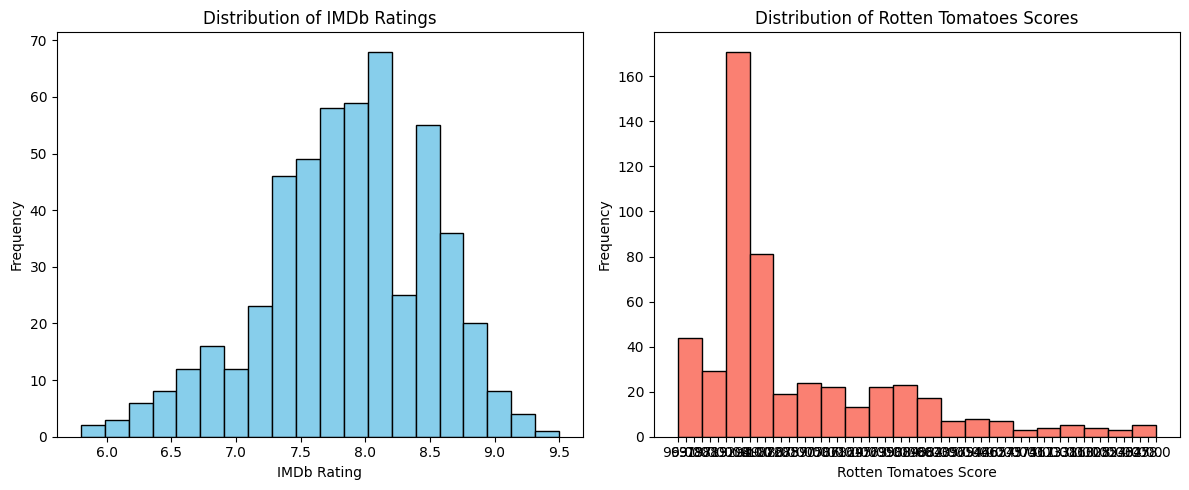

In [ ]:
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.hist(tv_shows['IMDb'], bins=20, color='skyblue', edgecolor='black')
plt.title('Distribution of IMDb Ratings')
plt.xlabel('IMDb Rating')
plt.ylabel('Frequency')

plt.subplot(1, 2, 2)

plt.hist(tv_shows['Rotten Tomatoes'].astype(str), bins=20, color='salmon', edgecolor='black')
plt.title('Distribution of Rotten Tomatoes Scores')
plt.xlabel('Rotten Tomatoes Score')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

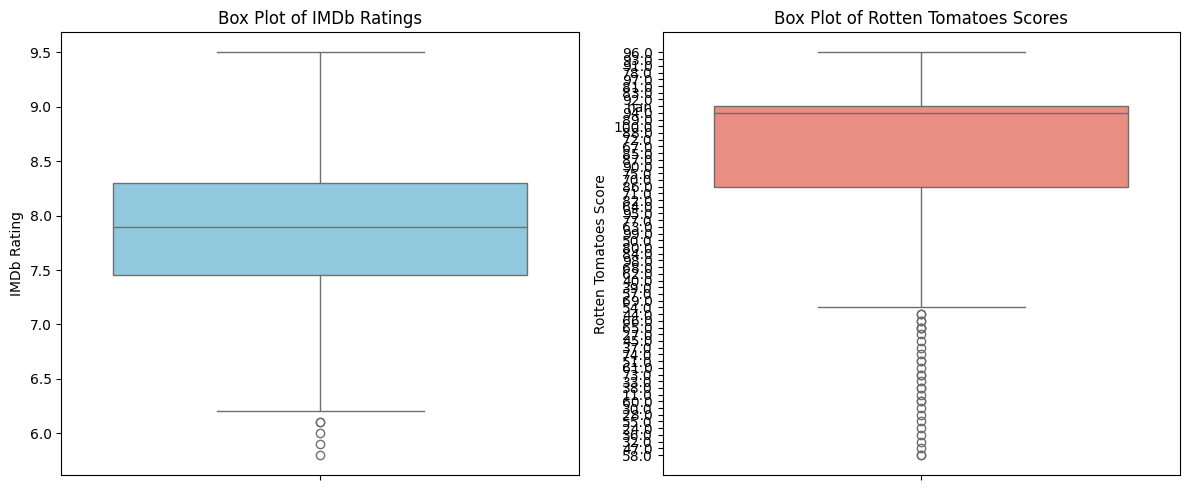

In [ ]:
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
sns.boxplot(y=tv_shows['IMDb'], color='skyblue')
plt.title('Box Plot of IMDb Ratings')
plt.ylabel('IMDb Rating')

plt.subplot(1, 2, 2)
sns.boxplot(y=tv_shows['Rotten Tomatoes'], color='salmon')
plt.title('Box Plot of Rotten Tomatoes Scores')
plt.ylabel('Rotten Tomatoes Score')

plt.tight_layout()
plt.show()

In [ ]:
Q1 = tv_shows['IMDb'].quantile(0.25)
Q3 = tv_shows['IMDb'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

outliers_imdb = tv_shows[(tv_shows['IMDb'] < lower_bound) | (tv_shows['IMDb'] > upper_bound)]
num_outliers_imdb = len(outliers_imdb)

print(f"Number of outliers in IMDb ratings: {num_outliers_imdb}")

Number of outliers in IMDb ratings: 5


In [ ]:

tv_shows['Rotten Tomatoes'] = tv_shows['Rotten Tomatoes'].str.rstrip('%').astype(float) /100


Q1_rt = tv_shows['Rotten Tomatoes'].quantile(0.25)
Q3_rt = tv_shows['Rotten Tomatoes'].quantile(0.75)
IQR_rt = Q3_rt - Q1_rt
lower_bound_rt = Q1_rt - 1.5 * IQR_rt
upper_bound_rt = Q3_rt + 1.5 * IQR_rt

outliers_rt = tv_shows[(tv_shows['Rotten Tomatoes'] < lower_bound_rt) | (tv_shows['Rotten Tomatoes'] > upper_bound_rt)]
num_outliers_rt = len(outliers_rt)

print(f"Number of outliers in Rotten Tomatoes ratings: {num_outliers_rt}")

Number of outliers in Rotten Tomatoes ratings: 20


In [ ]:

tv_shows['IMDb_winsorized'] = winsorize(tv_shows['IMDb'], limits=[0.05, 0.05])  # Cap 5% at both tails


tv_shows['Rotten_Tomatoes_winsorized'] = winsorize(tv_shows['Rotten Tomatoes'], limits=[0.05, 0.05])

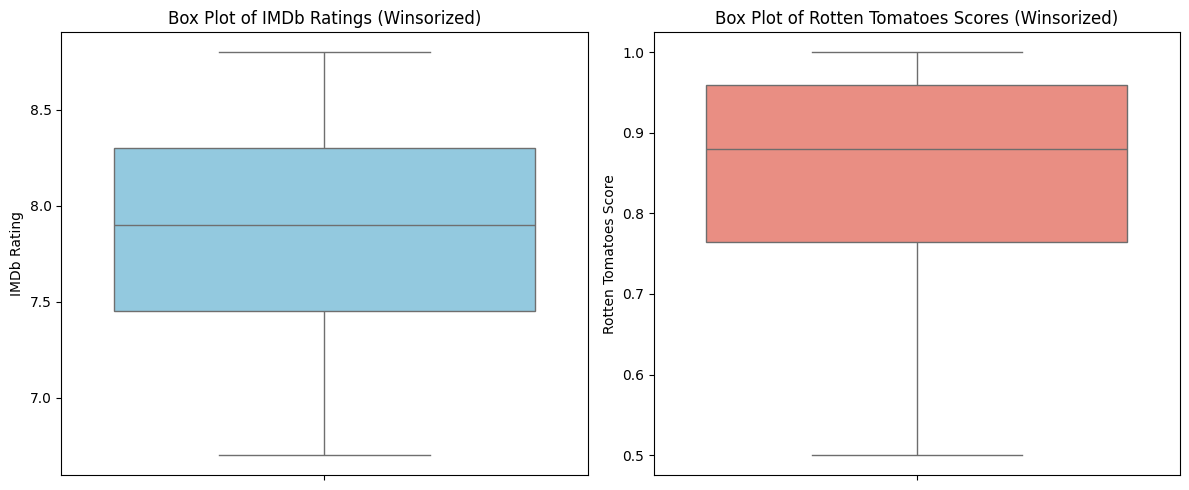

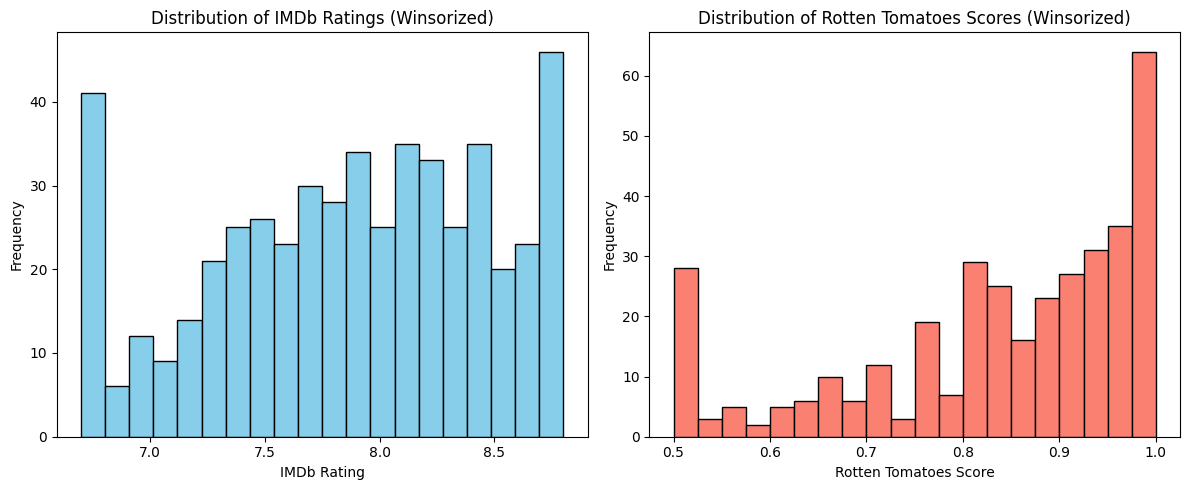

In [ ]:
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
sns.boxplot(y=tv_shows['IMDb_winsorized'], color='skyblue')
plt.title('Box Plot of IMDb Ratings (Winsorized)')
plt.ylabel('IMDb Rating')

plt.subplot(1, 2, 2)
sns.boxplot(y=tv_shows['Rotten_Tomatoes_winsorized'], color='salmon')
plt.title('Box Plot of Rotten Tomatoes Scores (Winsorized)')
plt.ylabel('Rotten Tomatoes Score')

plt.tight_layout()
plt.show()


plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.hist(tv_shows['IMDb_winsorized'], bins=20, color='skyblue', edgecolor='black')
plt.title('Distribution of IMDb Ratings (Winsorized)')
plt.xlabel('IMDb Rating')
plt.ylabel('Frequency')

plt.subplot(1, 2, 2)
plt.hist(tv_shows['Rotten_Tomatoes_winsorized'], bins=20, color='salmon', edgecolor='black')
plt.title('Distribution of Rotten Tomatoes Scores (Winsorized)')
plt.xlabel('Rotten Tomatoes Score')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

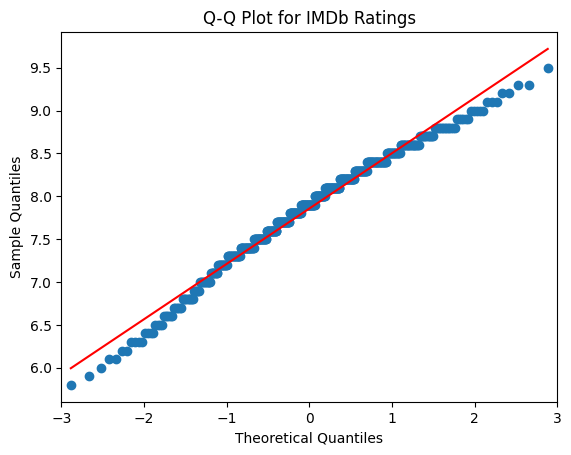

In [ ]:
fig = sm.qqplot(tv_shows['IMDb'], line='s')
plt.title("Q-Q Plot for IMDb Ratings")
plt.show()

In [ ]:

correlation = tv_shows['IMDb'].corr(tv_shows['Rotten Tomatoes'])
print(f"Correlation between IMDb and Rotten Tomatoes ratings: {correlation}")

Correlation between IMDb and Rotten Tomatoes ratings: 0.3239336697386146


                     IMDb  Rotten Tomatoes      Year
IMDb             1.000000         0.323934 -0.272609
Rotten Tomatoes  0.323934         1.000000  0.020911
Year            -0.272609         0.020911  1.000000


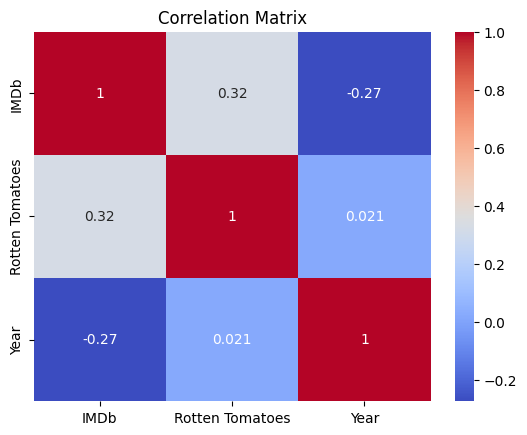

In [ ]:

numerical_features = ['IMDb', 'Rotten Tomatoes', 'Year']
correlation_matrix = tv_shows[numerical_features].corr()

print(correlation_matrix)

sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

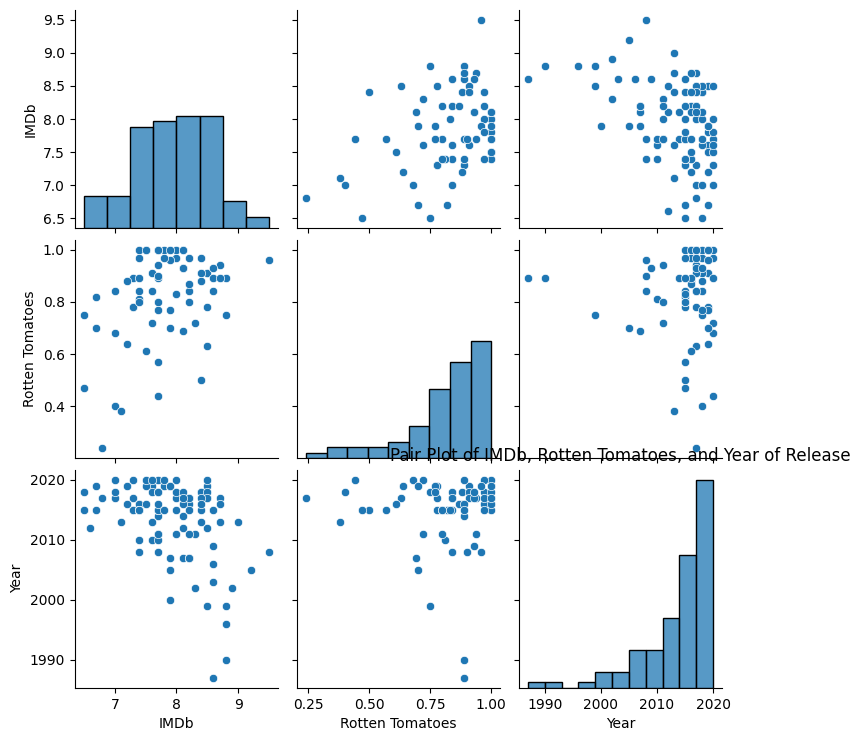

In [ ]:
sample_data = tv_shows.sample(n=100, random_state=42)
sns.pairplot(sample_data[['IMDb', 'Rotten Tomatoes', 'Year']])
plt.title("Pair Plot of IMDb, Rotten Tomatoes, and Year of Release")
plt.show()

In [ ]:

import pandas as pd
import numpy as np
from scipy import stats


data = pd.read_csv('TV_Shows1.csv')


data.head()


,Unnamed: 0,Title,Year,Age,IMDb,Rotten Tomatoes,Netflix,Hulu,Prime Video,Disney+
0,0,Breaking Bad,2008,18+,9.5,96%,1,0,0,0
1,1,Stranger Things,2016,16+,8.8,93%,1,0,0,0
2,2,Money Heist,2017,18+,8.4,91%,1,0,0,0
3,3,Sherlock,2010,16+,9.1,78%,1,0,0,0
4,4,Better Call Saul,2015,18+,8.7,97%,1,0,0,0


In [ ]:

for platform in ['Netflix', 'Hulu', 'Prime Video', 'Disney+']:
    print(f"Unique values for {platform}:")
    print(data[platform].unique())


Unique values for Netflix:
[1]
Unique values for Hulu:
[0 1]
Unique values for Prime Video:
[0 1]
Unique values for Disney+:
[0 1]


In [ ]:

netflix_ratings = data[data['Netflix'] == True]['IMDb']
hulu_ratings = data[data['Hulu'] == True]['IMDb']


print(f"Netflix sample size: {len(netflix_ratings)}")
print(f"Hulu sample size: {len(hulu_ratings)}")


Netflix sample size: 511
Hulu sample size: 64


In [ ]:

print("Column names:", data.columns)
print("\nData Sample:\n", data.head())


for column in data.columns:
    print(f"\nUnique values in '{column}':")
    print(data[column].unique())


Column names: Index(['Unnamed: 0', 'Title', 'Year', 'Age', 'IMDb', 'Rotten Tomatoes',
       'Netflix', 'Hulu', 'Prime Video', 'Disney+'],
      dtype='object')

Data Sample:
    Unnamed: 0             Title  Year  Age  IMDb Rotten Tomatoes  Netflix  \
0           0      Breaking Bad  2008  18+   9.5             96%        1   
1           1   Stranger Things  2016  16+   8.8             93%        1   
2           2       Money Heist  2017  18+   8.4             91%        1   
3           3          Sherlock  2010  16+   9.1             78%        1   
4           4  Better Call Saul  2015  18+   8.7             97%        1   

   Hulu  Prime Video  Disney+  
0     0            0        0  
1     0            0        0  
2     0            0        0  
3     0            0        0  
4     0            0        0  

Unique values in 'Unnamed: 0':
[  0   1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17
  18  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33

In [ ]:
import numpy as np
from scipy import stats


mean_netflix = netflix_ratings.mean()
mean_hulu = hulu_ratings.mean()
std_netflix = netflix_ratings.std()
std_hulu = hulu_ratings.std()
n_netflix = len(netflix_ratings)
n_hulu = len(hulu_ratings)


se = np.sqrt((std_netflix**2 / n_netflix) + (std_hulu**2 / n_hulu))


df = ((std_netflix**2 / n_netflix) + (std_hulu**2 / n_hulu))**2 / \
     (((std_netflix**2 / n_netflix)**2 / (n_netflix - 1)) + ((std_hulu**2 / n_hulu)**2 / (n_hulu - 1)))
t_critical = stats.t.ppf(0.975, df)

margin_of_error = t_critical * se


print(f"Margin of Error: {margin_of_error}")


Margin of Error: 0.15697931441757396


In [ ]:

print("Interpretation:")
print(f"The margin of error is {margin_of_error:.2f}. This suggests that the difference in IMDb ratings "
      f"between Netflix and Hulu shows could vary by ±{margin_of_error:.2f} points. "
      f"This range provides a sense of the accuracy and reliability of the observed mean difference in ratings.")


Interpretation:
The margin of error is 0.16. This suggests that the difference in IMDb ratings between Netflix and Hulu shows could vary by ±0.16 points. This range provides a sense of the accuracy and reliability of the observed mean difference in ratings.


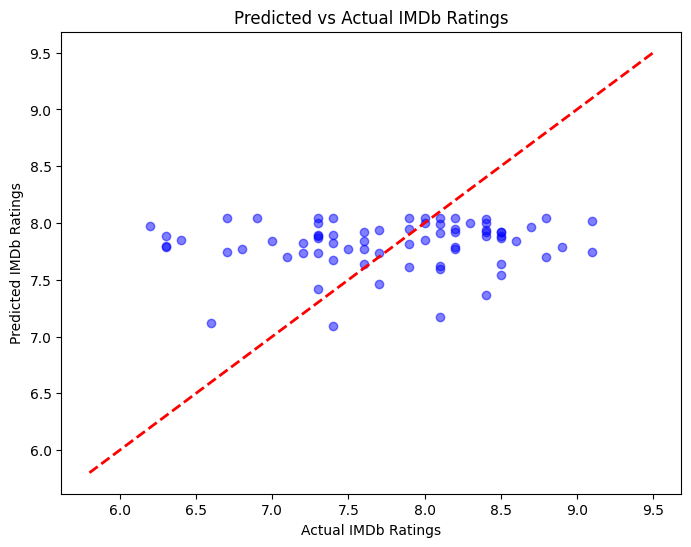

{'Original Model': {'MSE': 0.5213590894021808, 'RMSE': 0.722051999098528, 'MAE': 0.5849619091928788}, 'Model with New Features': {'MSE': 0.5014804101254589, 'RMSE': 0.7081528155175681, 'MAE': 0.5755599335887074}}


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer


file_path = '/content/TV_Shows1.csv'
tv_shows = pd.read_csv('/content/TV_Shows1.csv')


tv_shows['IMDb'] = pd.to_numeric(tv_shows['IMDb'], errors='coerce')
tv_shows['Rotten Tomatoes'] = tv_shows['Rotten Tomatoes'].str.rstrip('%').astype(float)


tv_shows = tv_shows.dropna(subset=['IMDb', 'Rotten Tomatoes'])


sample_data = tv_shows[['Rotten Tomatoes']]
y = tv_shows['IMDb']


X_train, X_test, y_train, test_data_y = train_test_split(sample_data, y, test_size=0.2, random_state=42)

regressor = LinearRegression()
regressor.fit(X_train, y_train)


predictions = regressor.predict(X_test)

mean_squared_error = mean_squared_error(test_data_y, predictions)
root_mean_squared_error = np.sqrt(mean_squared_error)
mean_absolute_error = mean_absolute_error(test_data_y, predictions)

plt.figure(figsize=(8, 6))
plt.scatter(test_data_y, predictions, color='blue', alpha=0.5)
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'r--', linewidth=2)
plt.xlabel("Actual IMDb Ratings")
plt.ylabel("Predicted IMDb Ratings")
plt.title("Predicted vs Actual IMDb Ratings")
plt.show()


tv_shows['Age Numeric'] = tv_shows['Age'].str.extract('(\d+)').astype(float)


tv_shows['Platform Count'] = tv_shows[['Netflix', 'Hulu', 'Prime Video', 'Disney+']].sum(axis=1)


new_features_sample_data = tv_shows[['Rotten Tomatoes', 'Age Numeric', 'Platform Count']]
new_features_y = tv_shows['IMDb']

data_imputer = SimpleImputer(strategy='mean')
X_new_features_imputed = data_imputer.fit_transform(new_features_sample_data)

X_train_new, X_test_new, y_train_new, y_test_new = train_test_split(
    X_new_features_imputed, new_features_y, test_size=0.2, random_state=42
)

regressor_new = LinearRegression()
regressor_new.fit(X_train_new, y_train_new)

y_pred_new = regressor_new.predict(X_test_new)

mse_new = mean_squared_error(y_test_new, y_pred_new)
rmse_new = np.sqrt(mse_new)
mae_new = mean_absolute_error(y_test_new, y_pred_new)

print({
    "Original Model": {
        "MSE": mean_squared_error,
        "RMSE": root_mean_squared_error,
        "MAE": mean_absolute_error
    },
    "Model with New Features": {
        "MSE": mse_new,
        "RMSE": rmse_new,
        "MAE": mae_new
    }
})